# 第6章 文書のクラスタリング

In [1]:
# これまでに定義した関数の読み込み

from chapter01 import get_string_from_file
from chapter02 import get_words_from_file, configure_fonts_for_japanese
from chapter03 import get_words, bows_to_cfs, load_aozora_corpus, get_bows,  add_to_corpus, \
    get_weights, translate_bows, get_tfidfmodel_and_weights
from chapter04 import vsm_search, get_list_from_file

%matplotlib inline

## 6.2 k平均法

In [2]:
# Listing 6.1 #

# 書籍の紹介文の読み込み
book_texts = [get_string_from_file('data/ch06/%d.txt' % i) for i in range(12)]

# 特徴語の重みを計算して文書ベクトルを作成
# 補助的なコーパスとして青空文庫を利用
tfidf_model, dic, vectors = get_tfidfmodel_and_weights(book_texts)

# 書籍のタイトルを読み込む
titles = get_list_from_file('data/ch06/book-titles.txt')

In [3]:
# Listing 6.2 #

from gensim import matutils
import numpy as np
from sklearn.cluster import KMeans

# 0を補ったベクトルに変換
dense_vectors = matutils.corpus2dense(vectors, len(dic)).T

# k-meansで K(=4)個のクラスタに分類
K = 4
result = KMeans(n_clusters=K).fit(dense_vectors)

# クラスタごとに書籍タイトルを表示
# np.where(l == m)でリストl中のmが出現する位置が得られる
for label in range(0, K):
    print([titles[i] for i in np.where(result.labels_ == label)[0]])

['森林水文学', '植物と微気象', '生態系生態学']
['風車工学入門', '再生可能エネルギー技術']
['都市景観の環境デザイン', '地球と都市の温暖化', '都市環境から考えるこれからのまちづくり', '都市計画']
['Webアプリケーション構築入門', '自作PCクラスタ超入門', 'やさしい音と音楽のプログラミング']


## 6.3 凝集型階層的クラスタリング

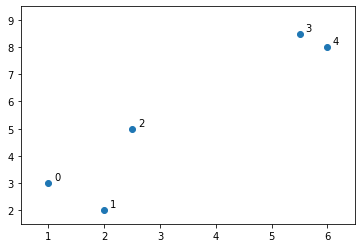

In [4]:
# Listing 6.3 #

# 描画用モジュールのimport
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline                                                                 

data = [[1, 3], [2, 2], [2.5, 5], [5.5, 8.5], [6, 8]]

# matplotlibのpyplotではデータをx軸，y軸に分けて指定する
# dataからx軸を取り出す
xlist = [x[0] for x in data]
# dataからy軸を取り出す
ylist = [x[1] for x in data]

# x軸の表示範囲の指定
plt.xlim(0.5, 6.5)
# y軸の表示範囲の指定
plt.ylim(1.5, 9.5)

# dataをプロット
plt.scatter(xlist, ylist)

# プロットの位置から(delta, delta)離れたところにデータ番号を表示する
delta = 0.1
for i, (x, y) in  enumerate(zip(xlist, ylist)):
    plt.annotate(str(i), (x + delta, y + delta))

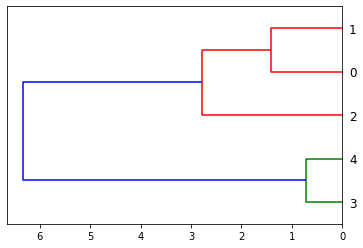

In [5]:
# Listing 6.4 #

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# 要素間の距離を計算
d = pdist(data)

# 群平均法でクラスタリング
L = linkage(d, method='average')

# 色分けの閾値を4にして横向きにデンドログラムを作成
threshold = 4
dendrogram(L,  orientation='left', color_threshold=threshold);

In [6]:
# Listing 6.5 #

from scipy.cluster.hierarchy import fcluster

d = pdist(data)
L = linkage(d, method='average')

# fclusterは各要素が属するクラスタの番号のリストを返す
# つまり，f[i]はdata[i]が属するクラスタの番号となる
threshold = 4
f = fcluster(L, threshold, criterion='distance')

# dataの要素の番号iと，それが属するクラスタの番号jを表示
for i, j in enumerate(f):
    print('data[%d]: cluster %d' % (i, j))

data[0]: cluster 2
data[1]: cluster 2
data[2]: cluster 2
data[3]: cluster 1
data[4]: cluster 1


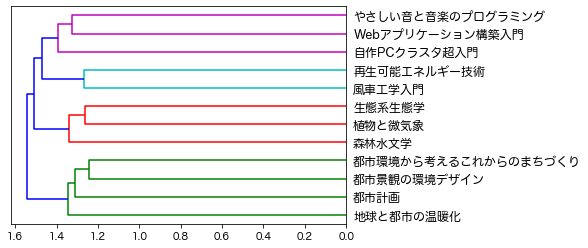

In [7]:
# Listing 6.6 #

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# 日本語フォントの設定
configure_fonts_for_japanese()

# 文書ベクトル間の距離を計算
d = pdist(dense_vectors)

# ウォード法を使う(color_threshold=1.4)
L = linkage(d, method='ward')
dendrogram(L,  labels=titles, color_threshold=1.4, orientation='left');

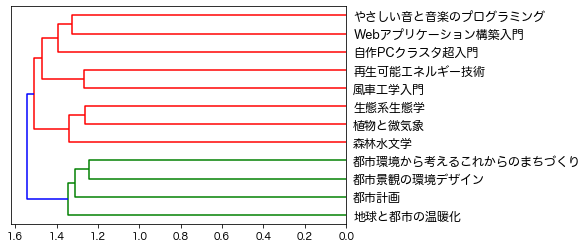

In [8]:
# Listing 6.6 #

# ウォード法を使う(color_threshold=1.54)

dendrogram(L,  labels=titles, color_threshold=1.54, orientation='left');

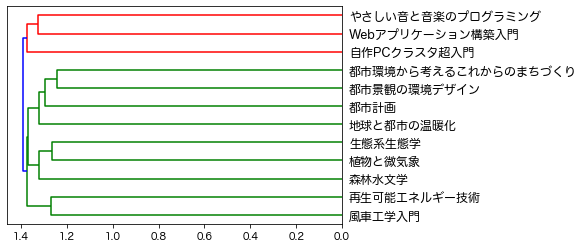

In [9]:
# Listing 6.7 #

L = linkage(d, method='average')
dendrogram(L,  labels=titles, color_threshold=1.38, orientation='left');

In [10]:
# Listing 6.8 #

from scipy.cluster.hierarchy import cophenet

d = pdist(dense_vectors)
methods = ['average', 'centroid', 'complete', 'median', 'single', 'ward', 'weighted']
for m in methods:
    L = linkage(d, method=m)
    c = cophenet(L, d)
    # cophenetが返す2つの値のうちの最初の値がコーフェン相関係数
    print('%s\t%7.4f' % (m, c[0]))                                                 

average	 0.8871
centroid	-0.5390
complete	 0.8341
median	 0.0012
single	 0.8531
ward	 0.7695
weighted	 0.8834
